# 정규표현의 기본 특성
## 정규표현(regular expression)
특정 유형(패턴)의 문자열의 연쇄 패턴을 정규표현이라 한다.
- "car" 검색: car만? car 포함?

## 반복 메타 문자
- *&emsp;&emsp;선행 문자 0회 이상 반복
- +&emsp;&emsp;선행 문자 1회 이상 반복
- ?&emsp;&emsp;선행 문자 0/1회 반복(없거나 있거나)
- {m}&emsp;&emsp;선행 문자 m회 반복
- {m,n}&emsp;&emsp;선행 문자 m-n회 사이 반복
- {m,}&emsp;&emsp;선행 문자 m회 이상 반복
- {,n}&emsp;&emsp;선행 문자 n회 이하 반복
{}를 쓸 때, 스페이스(' ')가 들어가면 안 된다.
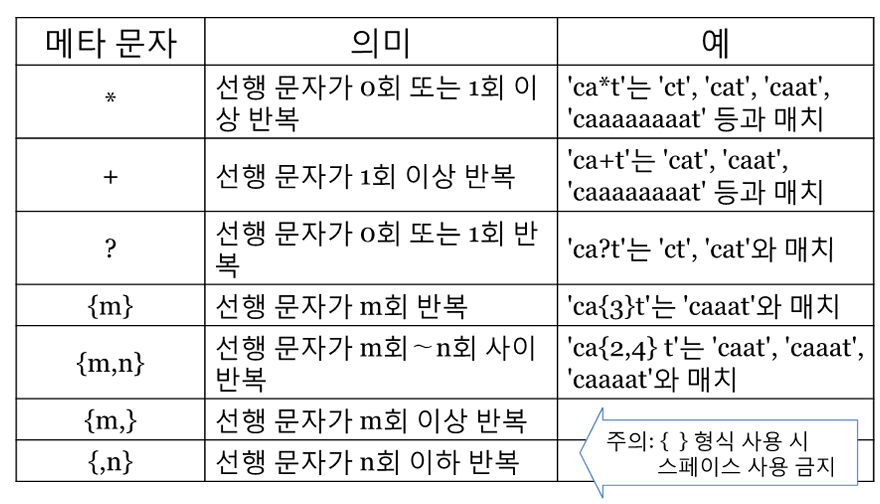

## 매칭 및 기타 메타 문자
- .&emsp;&emsp;'\n' 제외 하나의 문자와 매치
- ^&emsp;&emsp;문자열의 시작과 매치
- 
[A-z]: A와 z 사이에 다른 기호가 포함되어 있으므로 주의해야 함.

## re.match()

In [2]:
import re

In [3]:
re.match('1', '1234')
# 1234는 1로 시작되나?

<re.Match object; span=(0, 1), match='1'>

첫 번째 논항 자리에만 정규표현식이 올 수 있다.<br/><br/><br/>
match 함수의 return 값은 int도 str도 아닌 re.Match형이다.
- span과 match 정보를 포함하고 있다.
- span: 슬라이싱 범위라고 생각하면 된다.

In [4]:
print(re.match('1', '1234'))
type(re.match('1', '1234'))

<re.Match object; span=(0, 1), match='1'>


re.Match

In [5]:
re.match('2', '1234')
# 아무것도 출력되지 않음.
# None값이 반환되기 땜문이다.

In [6]:
type(re.match('2', '1234'))

NoneType

In [7]:
print(re.match('2', '1234'))

None


In [8]:
re.match('[0-9]', '1234')

<re.Match object; span=(0, 1), match='1'>

In [9]:
re.match('[0-9]', '3456')

<re.Match object; span=(0, 1), match='3'>

In [10]:
re.match('[0-9]+', '3456')
# + 는 선행 문자가 1회 이상 반복!!

<re.Match object; span=(0, 4), match='3456'>

In [11]:
re.match('[0-9]+', '1234')

<re.Match object; span=(0, 4), match='1234'>

In [12]:
re.match('345', '3456')

<re.Match object; span=(0, 3), match='345'>

In [13]:
re.match('346', '3456')

In [14]:
re.match('[345]', '3456')
# 대괄호는 [] 안에 있는 것 중 하나와 매치되는 것을 의미한다.
# 대괄호 안의 순서는 상관없다.

<re.Match object; span=(0, 1), match='3'>

In [15]:
re.match('[345]+', '3456')
# [345]에서 3,4,5로 쭉 연쇄되면 된다.

<re.Match object; span=(0, 3), match='345'>

In [16]:
re.match('[0-9]*', '3456')

<re.Match object; span=(0, 4), match='3456'>

In [17]:
re.match('[0-9]?', '3456')

<re.Match object; span=(0, 1), match='3'>

In [18]:
re.match('.', '3456')

<re.Match object; span=(0, 1), match='3'>

In [19]:
re.match('.', '3456')

<re.Match object; span=(0, 1), match='3'>

In [20]:
re.match('.+', '3456')

<re.Match object; span=(0, 4), match='3456'>

## 정규표현 이스케이프 문자
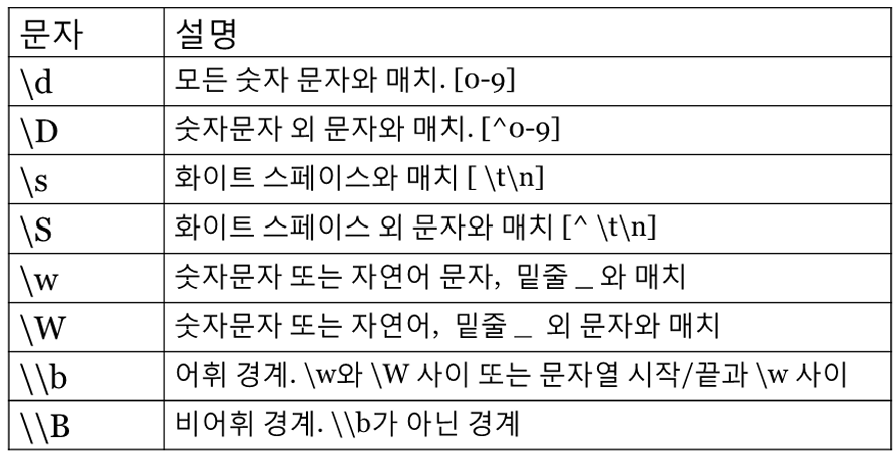
여기서 ^는 not의 의미

## group 메서드
match 함수의 결과가 None으로 반환되면 group 메서드를 사용할 수 없다.

In [21]:
re.match('[0-9]+', '3456abc\t\n.+?*').group()

'3456'

In [22]:
re.match('[0-9a-z]+', '3456abc\t\n.+?*').group()

'3456abc'

In [23]:
re.match('[0-9a-z\t\n]+', '3456abc\t\n.+?*').group()

'3456abc\t\n'

In [24]:
re.match('[0-9a-z\t\n.+?*]+', '3456abc\t\n.+?*').group()

'3456abc\t\n.+?*'

In [25]:
re.match('[a-z\t\n.+?*]+', '3456abc\t\n.+?*')
# 여기에 group 메서드를 쓰면 오류가 뜬다!!!

In [26]:
type(re.match('[a-z\t\n.+?*]+', '3456abc\t\n.+?*'))
# None의 타입은 NoneType

NoneType

In [ ]:
re.match('\d+', '3456abc\t\n.+?*').group()

'3456'

In [28]:
re.match('\d+\w+', '3456abc\t\n.+?*').group()

'3456abc'

In [29]:
re.match('\S+', '3456abc\t\n.+?*').group()

'3456abc'

In [30]:
re.match('\w+', '3456abc\t\n.+?*').group()

'3456abc'

In [31]:
re.match('\w+\s+', '3456abc\t\n.+?*').group()

'3456abc\t\n'

In [32]:
re.match('[\w]+', '3456abc\t\n.+?*').group()

'3456abc'

In [33]:
re.match('[\w\s]+', '3456abc\t\n.+?*').group()

'3456abc\t\n'

In [34]:
re.match('[\w\s\S]+', '3456abc\t\n.+?*').group()

'3456abc\t\n.+?*'